In [24]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
drive.mount('/gdrive', force_remount = True)
# cv.imread(path) 사진 불러오기 함수
# cv.resize(사진변수, (128,128))

Mounted at /gdrive


In [25]:
index = ["수성", "금성", "지구", "목성", "천왕성"]
data = [] # 15,128,128,3
label= [] # 15,1 

for i in range(5):
  for j in range (3):

    path = f'/gdrive/My Drive/prj/{i}/{j}.png'
    image = cv.imread(path)
    image = cv.resize(image, (256,256))
    image =image[64:192,64:192]
    data.append(image)
    label.append(i)

data = torch.Tensor(data)
label = torch.Tensor(label)
label = F.one_hot(label.long(), num_classes=5)



In [27]:
class planet_DNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.function = nn.Linear(128*128*3,5)
  def forward(self,x):
    x = x.reshape(x.shape[0], 128*128*3)
    return self.function(x)

In [40]:
model = planet_DNN()
lr = 0.001
epoch= 1000
optim = torch.optim.Adam(model.parameters(),lr=lr)
CELoss = nn.CrossEntropyLoss()

In [41]:
for epo in range(epoch):
  y_pred = model(data)
  optim.zero_grad()
  loss = CELoss(y_pred, label.to(float))
  loss.backward()
  optim.step()

  if epo % 100 ==0:
    print("loss: ", loss)


loss:  tensor(41.9217, dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)
loss:  tensor(-0., dtype=torch.float64, grad_fn=<DivBackward1>)


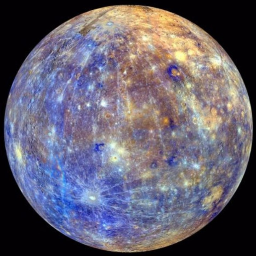

tensor([[7474.9482, 5274.4619, 9404.6162, 7465.1436, 9475.4512]],
       grad_fn=<AddmmBackward0>)
천왕성 지구


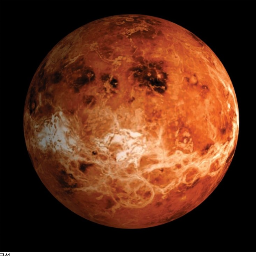

tensor([[ 6900.3862, 13418.2861,  1681.3723,  9531.1055,   532.4814]],
       grad_fn=<AddmmBackward0>)
금성 목성


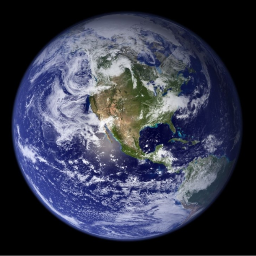

tensor([[ 4591.2383,  2484.5933, 10971.2314,  5976.4805,  7949.4043]],
       grad_fn=<AddmmBackward0>)
지구 천왕성


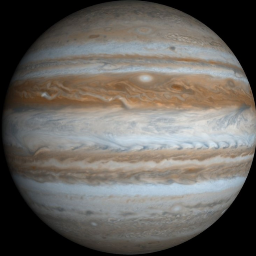

tensor([[ 9506.5850,  8294.0166,  6874.7314, 10348.7061,  9792.5215]],
       grad_fn=<AddmmBackward0>)
목성 천왕성


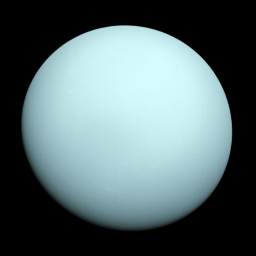

tensor([[13019.3408,  7143.9531, 12136.0547, 11943.8867, 18752.6855]],
       grad_fn=<AddmmBackward0>)
천왕성 수성


In [42]:
for i in range(5):
  # for j in range(1,4):
  path = f'/gdrive/My Drive/prj/{i}/3.png'
  tmp = cv.imread(path)
  tmp = cv.resize(tmp, (256,256))
  cv2_imshow(tmp)

  tmp = tmp[64:192,64:192]

  tmp = torch.Tensor(np.array(tmp)).unsqueeze(0)
  print(model(tmp))
  cur = index[np.argsort(list(model(tmp).tolist()))[0][-1]]
  cur2 = index[np.argsort(list(model(tmp).tolist()))[0][-2]]
  print(cur, cur2)